# The effect of socioeconomic factors on credit card approval

**Authors:**
* Brian McGiffin / mcgiffin / 117106404
* Walter Osborne / wosborne / 117443110
* Cedric Prentice / cprentic / 117196856

## Introduction

Credit is an increasingly important tool for Americans. The increasing costs of products like [housing](https://www.whitehouse.gov/cea/written-materials/2021/09/09/housing-prices-and-inflation/), [cars](https://fred.stlouisfed.org/series/CUSR0000SETA02), and home appliances mean that it is difficult or impossible for most Americans to buy them outright. Besides allowing people to make larger purchases than they otherwise could have, people with good credit get another big advantage: better terms for almost all credit products. People with good credit can get higher credit limits, larger loan amounts (for things like mortgages), longer loan terms, and lower interest rates.  
  
Unfortunately, not everyone has an equal chance to reap the opportunities credit provides. Historic inequalities mean that African Americans, for example, face significant financial disadvantages compared to white Americans. According to the [Center for American Progress](https://www.americanprogress.org/article/systematic-inequality/), black households have fewer personal savings, and they are more likely to need to use those savings (because of negative income shocks). This lack of available financial resources causes black households to fall into more debt than white households. All that debt makes it harder to get lines of credit.  
  
By looking at existing credit approval data, we can investigate how socioeconomic factors, like ethnicity, citizenship, and occupation, affect credit approval and credit scores. Over this tutorial, we will cover the [data science lifecycle](https://www.datascience-pm.com/data-science-life-cycle/): data collection, data processing, exploratory analysis and data visualization, analysis, and interpretation.  
  
### Table of contents:

1. Data Collection
2. Processing the Data
  
### Aside: [credit scores](https://www.investopedia.com/terms/c/credit_score.asp)

The most important datapoint of credit is the credit score. A credit score is a number that rates a consumer’s credit worthiness. It ranges from 300 to 850, with a higher score indicating a consumer that is more worthy. Lenders use it to evaluate the probability that a borrower will repay loans in a timely manner. There are five main factors that impact credit score:
1. Payment history (35% of score)
2. Total amount owed (30% of score)
3. Length of credit history (15% of score)
4. Types of credit (10% of score)
5. New credit (10% of score)

## Data collection

### Modules used

The libraries we used for this project, along with their descriptions and official documentation are as follows:
#### NumPy
NumPy provides support for  arrays and matrices, along with a large collection of mathematical functions to operate on these arrays efficiently. It is widely used in scientific computing and data analysis.
#### Pandas
Pandas is used for data manipulation and analysis. It provides data structures and functions for efficiently working with dataframes, which can be imported from CSV files or SQL tables.
#### Matplotlib/Seaborn
Matplotlib allows for creating visualizations such as histograms and line, scatter, and bar plots, providing an interface for creating interactive visualizations in Python. Seaborn is a  library built on top of Matplotlib additional and/or more attractive statistical graphics.
#### Sklearn
Scikit-learn provides a range of tools for machine learning and predictive modeling. It includes algorithms for classification, regression, clustering, dimensionality reduction, and model selection, along with pre-processing and model evaluation functions.

In [24]:
# Import the required modules
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


import sys
!{sys.executable} -m pip install scikit-learn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

### Importing the Data

The first step of the data science lifecycle is importing data. Our data is downloadable from [Kaggle](https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data), but it is originally sourced from The University of California, Irvine. **Note that certain columns have been rescaled to protect the anonymity of the applicants.** The data is hard to understand now, but in the next step we will clean it up and make it readable and usable for analysis.
  
The raw data is in CSV (Comma-Separated Value) format. To upload the data, we used the ```read_csv``` function from the [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) library.

In [2]:
# Load the data
cwd = os.getcwd()
df = pd.read_csv(cwd + '/crx.csv')
df

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
685,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
686,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
687,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


## Processing the Data

The data set we used has a pre-cleaned version and a raw version. Pre-cleaned data can make life easier, but we cleaned the raw data manually so it worked better for our analysis.  
  
**Important: Only run the data processing cells once! Running them multiple times will cause anomalies in the data and/or runtime errors!**

### Fixing the first row

Normally, the first line of text in a CSV file is the titles of the columns. However, the CSV file for this data did not have column names. The missing names caused the first entry in the data to be used as the column names for the dataframe instead. To fix this, we renamed the columns (the names are provided in [this file](https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names) from UCI) and added another entry in the table with the values from the original column names.

In [3]:
# Rename all of the columns
df.rename(columns={
    'b': 'gender',
    '30.83': 'age',
    '0': 'debt',
    'u': 'married',
    'g': 'bank_customer',
    'w': 'industry',
    'v': 'ethnicity',
    '1.25': 'years_employed',
    't': 'prior_default',
    't.1': 'employed',
    '01': 'credit_score',
    'f': 'drivers_license',
    'g.1': 'citizen',
    '00202': 'zip_code',
    '0.1': 'income',
    '+': 'approved'
}, inplace=True)

# Re add the first row to the dataframe
new_row = {
    'gender': ['b'],
    'age': [30.83],
    'debt': [0],
    'married': ['u'],
    'bank_customer': ['g'],
    'industry': ['w'],
    'ethnicity': ['v'],
    'years_employed': [1.25],
    'prior_default': ['t'],
    'employed': ['t'],
    'credit_score': [1],
    'drivers_license': ['f'],
    'citizen': ['g'],
    'zip_code': ['00202'],
    'income': [0],
    'approved': ['+']
}
df_temp = pd.DataFrame(new_row)
df = pd.concat([df, df_temp], ignore_index=True)

### Missing values

Missing values in the original data were marked with “?”. To make processing them easier, we used [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) ```replace``` to swap the question marks with ```numpy.NaN```, a [Numpy constant](https://numpy.org/doc/stable/reference/constants.html#numpy.NaN) that represents a non number.  
  
There are initially 690 entries in the table. The Pandas ```dropna``` [function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) removes rows with missing values (NaN). If we remove all rows that have a missing value, there are 653 rows remaining. This means that 94.6% of the entries still remain. Because 100 - 94.6 = 5.4%, which is less than 10%, which means that it is okay to remove missing values instead of trying to estimate them. If removing all rows with missing values removed 25% of the data, for example, then it would be better to estimate missing values. Eliminating missing values is the best option for this data because most of the columns are categorical variables. These are hard to estimate without doing machine learning.

In [4]:
# Replace missing values with NaN
df.replace(to_replace='?', value=np.NaN, inplace=True)
df.dropna(axis=0, how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           653 non-null    object 
 1   age              653 non-null    object 
 2   debt             653 non-null    float64
 3   married          653 non-null    object 
 4   bank_customer    653 non-null    object 
 5   industry         653 non-null    object 
 6   ethnicity        653 non-null    object 
 7   years_employed   653 non-null    float64
 8   prior_default    653 non-null    object 
 9   employed         653 non-null    object 
 10  credit_score     653 non-null    int64  
 11  drivers_license  653 non-null    object 
 12  citizen          653 non-null    object 
 13  zip_code         653 non-null    object 
 14  income           653 non-null    int64  
 15  approved         653 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.7+ KB


### Type conversion

A small quirk of the dataframe is that age has type ```object```. We want it to be represented by a numeric datatype, so we can perform mathematical operations on it during analysis. To solve this, we used the built-in [type conversion](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) Pandas has to convert the age values into ```float64```. We used the ```dtypes``` function, a Pandas dataframe function that displays the data types of every column in a dataframe, to easily verify the results of the conversion.

In [5]:
# Convert the age column from objects into floats
df['age'] = df['age'].astype(float)
df.dtypes

gender              object
age                float64
debt               float64
married             object
bank_customer       object
industry            object
ethnicity           object
years_employed     float64
prior_default       object
employed            object
credit_score         int64
drivers_license     object
citizen             object
zip_code            object
income               int64
approved            object
dtype: object

### Cleaning categorical variables

The categorical variables in the data are represented with letters. This is hard to understand, and it will make analysis difficult. To fix this, we replaced the categorical variables with more readable values. Since some of the values were randomized for anonymity, we cross referenced the cleaned version of the data from Kaggle and [US Census statistics](https://data.census.gov/). This allows us to get the categorical data as close to the real values as we possibly can. We also changed a lot of the letters into numbers to aid analysis. Using numbers opens the door for performing regression and machine learning with the categorical data. In the code, we split the replacement by variable, so it is easier to read. However, all of the replacement could be done in the same loop for efficiency gains. When changing the values, we removed the original columns with the unhelpful data, so the table does not get overwhelming.

### Getting rid of unhelpful columns

Some of the randomized columns cannot be decoded. The industry and zip code columns have too many potential values and no good way to figure out what the values really represent. Because they are so vague, we do not want to include them in our analysis. The columns we dropped are the industry and zip code columns.

In [6]:
pd.options.mode.chained_assignment = None
# Replace the existing gender values with numeric values
df.loc[df['gender'] == 'b','gender'] = 1 #Male
df.loc[df['gender'] == 'a','gender'] = 0 #Male

# Replace the existing marriage statuses with a numeric value
df.loc[df['married'] == 'u','married'] = 1 #married
df.loc[df['married'] == 'y','married'] = 0 #not married

# Replace existing bank customer values with numeric values
df.loc[df['bank_customer'] == 'p','bank_customer'] = 1 #customer
df.loc[df['bank_customer'] == 'g','bank_customer'] = 0 #non-customer

# Replace existing ethnicity values with a more helpful names
df.loc[df['ethnicity'] == 'bb','ethnicity'] = 'asian' 
df.loc[df['ethnicity'] == 'ff','ethnicity'] = 'latino' 
df.loc[df['ethnicity'] == 'h','ethnicity'] = 'black' 
df.loc[df['ethnicity'] == 'v','ethnicity'] = 'white'
ethnicities = ['asian','latino', 'black', 'white', 'other']
df.loc[~df['ethnicity'].isin(ethnicities),'ethnicity'] = 'other'


# Replace existing prior default, employed, and driver's license values with numeric values
df.loc[df['prior_default'] == 't','bank_customer'] = 1 #Customer has defaulted
df.loc[df['prior_default'] == 'f','bank_customer'] = 0 #Customer hasn't defaulted

df.loc[df['employed'] == 't','employed'] = 1 #Customer is employed
df.loc[df['employed'] == 'f','employed'] = 0 #Customer isn't employed

df.loc[df['drivers_license'] == 't','drivers_license'] = 1 #Customer has license
df.loc[df['drivers_license'] == 'f','drivers_license'] = 0 #Customer does not have license

df.loc[df['approved'] == '+','approved'] = 1 # Replace existing approval values with numeric values
df.loc[df['approved'] == '-','approved'] = 0 

df.loc[df['citizen'] == 'g','citizen'] = 'birth' 
df.loc[df['citizen'] == 'p','citizen'] = 'temporary' 
df.loc[df['citizen'] == 's','citizen'] = 'naturalized' 

# Drop industry and zip code because they are unusable
df.drop(columns=['industry', 'zip_code'], inplace=True)

df

,gender,age,debt,married,bank_customer,ethnicity,years_employed,prior_default,employed,credit_score,drivers_license,citizen,income,approved
0,0,58.67,4.460,1,1,black,3.04,t,1,6,0,birth,560,1
1,0,24.50,0.500,1,1,black,1.50,t,0,0,0,birth,824,1
2,1,27.83,1.540,1,1,white,3.75,t,1,5,1,birth,3,1
3,1,20.17,5.625,1,1,white,1.71,t,0,0,0,naturalized,0,1
4,1,32.08,4.000,1,1,white,2.50,t,0,0,1,birth,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,22.67,0.750,1,0,white,2.00,f,1,2,1,birth,394,0
686,0,25.25,13.500,0,0,latino,2.00,f,1,1,1,birth,1,0
687,1,17.92,0.205,1,0,white,0.04,f,0,0,0,birth,750,0
688,1,35.00,3.375,1,0,black,8.29,f,0,0,1,birth,0,0


### Cleaned data description

Keep in mind that some of the data was originally randomized for anonymity. We had to decode it to the best of our abilities. Many of the columns are self-explanatory, but a brief description of the confusing columns are below:
* Gender: 0 = female, 1 = male
* Married: 0 = single, divorced, etc.; 1 = married
* Drivers license: 0 = no license, 1 = license
* Approved: 0 = not approved for card, 1 = approved for card
* The credit score, outstanding debt, and income columns are rescaled for privacy, but the original distribution is preserved
* The zip code column and industry column were removed

## Exploratory analysis and data visualization

Exploratory data analysis helps us gain insights, identify patterns, and detect anomalies in the data. Identifying the main characteristics of the data is very helpful for:
* Understanding basic data patterns
* Determining appropriate modeling techniques
* Identifying potential biases
* Communicating our findings

### A quick look at age and race distribution

Two very important factors when examining wealth, debt, and credit are age and race. The generational wealth gap is a popular topic in the [media](https://fortune.com/2022/10/27/millennials-versus-boomers-wealth-gap-doubled/), and, as mentioned in the introduction, race plays a large role in wealth. Before performing more complex analysis, we want to look at the age and ethnic breakdown of the applicants in our data.  
  
To display the age distribution, we first used the Pandas ```describe``` method to get numeric values of the important statistics for ages. Then, we used Matplotlib to create a histogram of the data (documentation can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)).  
  
To view the proportions of different ethnicities, we used a pie chart. First, we created a deep copy of the original dataframe. This let us make significant changes to the data representation without messing up the original. We then dropped the irrelevant columns. To get the amount of applicants for each ethnicity, we did a [group by aggregation](https://www.w3schools.com/sql/sql_groupby.asp). This grouped all of the ethnicities and calculated how many applicants were in each ethnic category. Once we did that, we drew a pie chart using Matplotlib (documentation can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)). We wanted to display the percentage of each ethnicity and the raw count, so we made a custom ```autopct``` function. This let us adjust how the value in each slice of the chart was formatted.

In [7]:
# Get some basic age summary statistics
df['age'].describe()

count    653.000000
mean      31.503813
std       11.838267
min       13.750000
25%       22.580000
50%       28.420000
75%       38.250000
max       76.750000
Name: age, dtype: float64

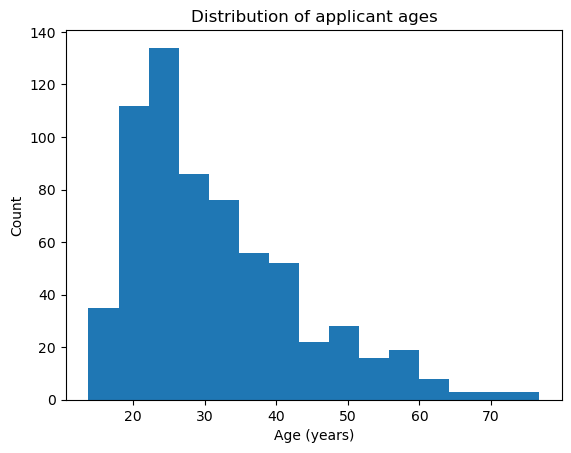

In [8]:
# Create a histogram of the age data
plt.hist(x=df.age, bins=15)
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.title('Distribution of applicant ages')
plt.show()

The histogram and numeric data show us some important facts about the age distribution:
* **The data is unimodal.** The only mode is clustered around the low-mid 20s
* **The data is not symmetric.** There is a heavy *right skew* on the histogram. Most of the data is centered around the younger ages (the median is 28.42 years). This makes sense because older people likely already have credit - they bought expensive things like cars and homes when they were younger, and now they do not spend as much. Older people probably opened their lines of credit at a younger age. It makes sense that younger people, who have recently entered the workforce, apply for credit at a higher rate. They want to start settling down, and having credit history is important for getting bigger loans.
* **There is a large spread.** The *range* of the data is ```76.75 - 13.75 = 63``` years. However, the *Interquartile Range (IQR)* is only ```38.25 - 22.58 = 15.67``` years. This suggests that the oldest people applying for credit are outliers.

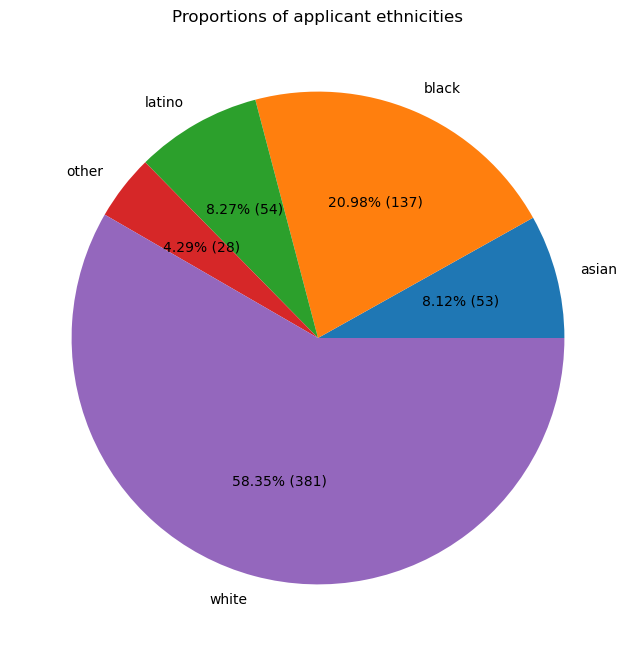

In [9]:
# Function for a customer autopct
def make_autopct(values):
    def my_autopct(pct):
        total = values.sum()
        val = int(round(pct * total / 100.0))
        return '{p:.2f}% ({v:d})'.format(p=pct, v=val)
    return my_autopct

# Create a deep copy of the original dataframe and drop unneeded columns
df_age_pie = df.copy(deep=True)[['ethnicity']]

# Calculate the frequency of each ethnicity (black, white, asian, latino, or other)
df_age_pie = df_age_pie.groupby('ethnicity')['ethnicity'].count()

# Organize the values
df_age_pie.sort_values(ascending=False)
labels = list(map(str, df_age_pie.keys()))

# Draw the plot
plt.figure(figsize=(8, 8))
plt.pie(df_age_pie, labels=labels, autopct=make_autopct(df_age_pie))
plt.title('Proportions of applicant ethnicities')
plt.show()

The pie chart shows us that the majority of the credit card applicants are white. This makes sense because white people are the majority ethnic group. Black people apply for credit cards more than Latinos despite making up less of the American population. This data will be more useful later on when we look at how race impacts credit approval (and how it interacts with some other categories).

C:\Users\bmcgi\AppData\Local\Temp\ipykernel_21896\4223316389.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['income'] >= 500][df['ethnicity']=='latino']


,gender,age,debt,married,bank_customer,ethnicity,years_employed,prior_default,employed,credit_score,drivers_license,citizen,income,approved
211,1,60.08,14.500,1,1,latino,18.000,t,1,15,1,birth,1000,1
216,1,55.92,11.500,1,1,latino,5.000,t,1,5,0,birth,8851,1
360,1,23.08,2.500,1,0,latino,0.085,f,0,0,1,birth,4208,0
435,1,19.58,0.585,1,0,latino,0.000,f,1,3,0,birth,769,0
572,0,65.17,14.000,1,1,latino,0.000,t,1,11,1,birth,1400,1
626,1,36.08,2.540,1,0,latino,0.000,f,0,0,0,birth,1000,0


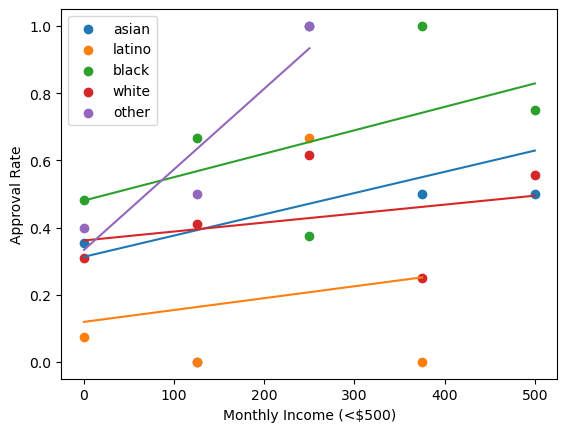

In [10]:
dfincome = df[df['income'] <= 500].copy(deep=True)
incomebins = pd.cut(dfincome['income'], 5, precision=0)
def mid(x):
    return str(x)
incomebins = incomebins.apply(mid)
incomebins = incomebins.astype(str)
dfincome['bins'] = incomebins
incomebins = incomebins.drop_duplicates()
for ethnicity in ethnicities:
    binmean = dfincome[dfincome['ethnicity'] == ethnicity][['bins','approved']].groupby(['bins'], as_index=False).mean()
    binmean['index'] = binmean.index
    x=binmean['index'].apply(lambda x: x * 125)
    y=binmean['approved']
    plt.scatter(x,y, label=ethnicity)
    plt.xlabel("Monthly Income (<$500)")
    plt.ylabel('Approval Rate')
    plt.legend(loc='upper left')
    plt.plot(np.unique(x),np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
incomebins
df[df['income'] >= 500][df['ethnicity']=='latino']

Accuracy:  0.6707503828483921


C:\Users\bmcgi\AppData\Local\Temp\ipykernel_21896\587834360.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  approved = df[df['approved'] == 1][df['income'] <20000]


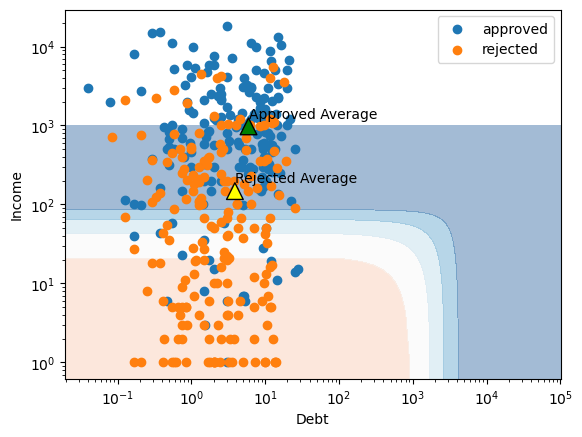

C:\Users\bmcgi\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


Accuracy:  0.6707503828483921


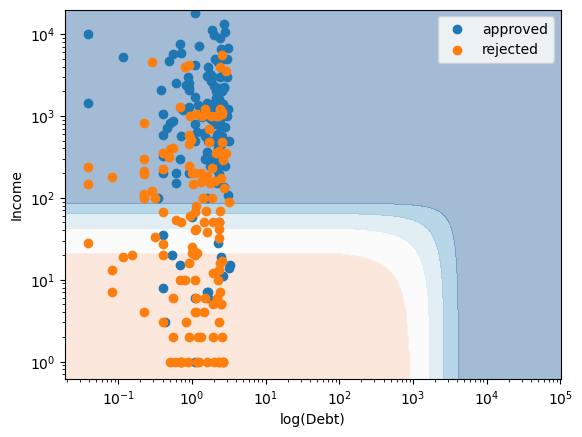

In [93]:
X1 = np.array([df['income'], df['debt']]).T.tolist()
y = np.array(df['approved']).tolist()


model1 = LogisticRegression(solver='liblinear')
model1.fit(X1, y)

x_min, x_max = min(df['income']) - 1000, max(df['income']) + 1000
y_min, y_max = min(df['debt']) - 1000, max(df['debt']) + 1000
xx, yy = np.meshgrid(np.arange(x_min, x_max, 100), np.arange(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model1.predict_proba(grid)[:, 1]
#probs = probs.reshape(xx.shape)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)

y_pred = model1.predict(X1)
accuracy = accuracy_score(y, y_pred)
print("Accuracy: " , accuracy)

approved = df[df['approved'] == 1][df['income'] <20000]
rejected = df[df['approved'] == 0]
plt.scatter(approved['debt'],approved['income'], label = 'approved')
plt.scatter(rejected['debt'],rejected['income'], label = 'rejected')
plt.annotate('Approved Average',(approved['debt'].mean(),approved['income'].mean()),arrowprops = dict(facecolor ='green'))
plt.annotate('Rejected Average',(rejected['debt'].mean(),rejected['income'].mean()),arrowprops = dict(facecolor ='yellow'))
plt.xlabel('Debt')
plt.ylabel('Income')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.show()

# X3 = np.array([df['debt'][df['income'] <20000], df['income'][df['income'] <20000]]).T.tolist()
# y = np.array(df['approved'][df['income'] <20000]).tolist()


# model1 = LogisticRegression(solver='liblinear')
# model1.fit(X3, y)

# y_min, y_max = min(df['income']) - 1000, max(df['income']) + 1000
# x_min, x_max = min(df['debt']) - 1000, max(df['debt']) + 1000
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 100), np.arange(y_min, y_max, 100))
# grid = np.c_[xx.ravel(), yy.ravel()]
# Z = model1.predict_proba(grid)[:, 1]
# #probs = probs.reshape(xx.shape)
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)

# y_pred = model1.predict(X3)
# accuracy = accuracy_score(y, y_pred)
# print("Accuracy: " , accuracy)

# approved = df[df['approved'] == 1][df['income'] <20000]
# rejected = df[df['approved'] == 0]
# plt.scatter(approved['income'], approved['debt'], label = 'approved')
# plt.scatter(rejected['income'], rejected['debt'], label = 'rejected')
# plt.annotate('Approved Average',(approved['debt'].mean(),approved['income'].mean()),arrowprops = dict(facecolor ='green'))
# plt.annotate('Rejected Average',(rejected['debt'].mean(),rejected['income'].mean()),arrowprops = dict(facecolor ='yellow'))
# plt.xlabel('Debt')
# plt.ylabel('Income')
# plt.legend(loc='upper right')
# # plt.xscale('log')
# #plt.ylim(0, 20000)
# plt.xscale('log')

# plt.xlim(0, 2000)

# plt.yscale('log')
# plt.show()
# # X = np.array([df['income'], np.log2(df['debt'])].T.tolist()
# # model2 = LogisticRegression()
# # model2.fit(X, y)

# # x_min, x_max = min(df['income']) - 1000, max(df['income']) + 1000
# # y_min, y_max = min(np.log2(df['debt'])) - 1000, max(np.log2(df['debt'])) + 1000
# # xx, yy = np.meshgrid(np.arange(x_min, x_max, 100), np.arange(y_min, y_max, 100))
# # grid = np.c_[xx.ravel(), yy.ravel()]
# # Z = model2.predict_proba(grid)[:, 1]
# # #probs = probs.reshape(xx.shape)
# # Z = Z.reshape(xx.shape)
# # plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)
df['logdebt'] = np.log2(df['debt'])
df['logdebt'] = df['logdebt'].fillna(0)
df.loc[df['logdebt'] < 0, 'logdebt'] = 0


X2 = np.array([df['income'], df['debt']]).T.tolist()
y = np.array(df['approved']).tolist()


#print(X2)
model2 = LogisticRegression(solver='liblinear')
model2.fit(X2, y)

y_pred = model1.predict(X2)
accuracy = accuracy_score(y, y_pred)
print("Accuracy: " , accuracy)

x_min, x_max = min(df['income']) - 1000, max(df['income']) + 1000
y_min, y_max = min(df['debt']) - 1000, 20000 #max(df['debt']) + 1000
xx, yy = np.meshgrid(np.arange(x_min, x_max, 100), np.arange(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model2.predict_proba(grid)[:, 1]
#probs = probs.reshape(xx.shape)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)


approved['log_debt'] = approved['debt'].apply(lambda x : np.log(x))
rejected['log_debt'] = rejected['debt'].apply(lambda x : np.log(x))
plt.scatter(approved['log_debt'],approved['income'], label = 'approved')
plt.scatter(rejected['log_debt'],rejected['income'], label = 'rejected')
plt.annotate('Approved Average',(approved['log_debt'].mean(),approved['income'].mean()),arrowprops = dict(facecolor ='green'))
plt.annotate('Rejected Average',(rejected['log_debt'].mean(),rejected['income'].mean()),arrowprops = dict(facecolor ='yellow'))
plt.xlabel('log(Debt)')
plt.ylabel('Income')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.show()



# Machine Learning

In addition to presenting our data< we are also crating a model that will be able to predict approval for a new applicant. To do this, we will construct a decision tree to simplify our model creation.

Constructing a tree arbitrarily will be of little use, so we will use the random forest method, which randomly makes several trees and choses the one that best models the data. Each tree will be created using the sample dataset and its effectiveness will be measured by how well it is able to predict values in the test dataset.

In [16]:
# Create our training splits
X = df.drop(columns = ['approved', 'ethnicity', 'citizen'], axis = 1)
y = df['approved']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Encode categoorical values so they can be used in tree creation
label_encoder = LabelEncoder()
df['ethnicity_encoded'] = label_encoder.fit_transform(df['ethnicity'])
df['citizen_encoded'] = label_encoder.fit_transform(df['citizen'])

In [18]:
# Create a Decision Tree Classifier
clf = tree.DecisionTreeClassifier()

# Train the classifier on the traing data
clf.fit(X_train, y_train)

# Make a prediction on the test data using the model
y_pred = clf.predict(X_test)

# Compare the predicted values to the actual values
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of First Tree on test data: ", accuracy)

ValueError: could not convert string to float: 'l'

In [14]:
# Create a Random Forest classifier with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Compare the predicted values to the actual values
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of best tree:", accuracy)

# Get the best tree from the classifer
best_tree = rf_classifier.estimators_[0]

#Display the tree
class_names = list(map(str, rf_classifier.classes_))
plt.figure(figsize=(12, 12))
tree.plot_tree(best_tree, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()


ValueError: could not convert string to float: 'l'

In [ ]:
# Cross validate the tree on 10 folds
scores = cross_val_score(rf_classifier, X, y, cv=10)

# Print the accuracy scores for each fold
print("Accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

## Conclusions
